In [96]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

def generateSineWave(frequency, amplitude, sampleFrequency, N, phi=0.0):
    return amplitude * np.exp(-1j*2*np.pi*(phi + frequency*1/sampleFrequency*np.arange(0,N,1)))

def addNoise(input,var):

    noise=np.random.multivariate_normal([0,0],np.eye(2)*var/2,len(input))
    noise=noise[:,0]+1j*noise[:,1]

    return input+noise

def generateZeroPadSineWave(frequency, amplitude, sampleFrequency, N, fracZero=0.3, phi=0.0):
    N_zero = np.int32(np.ceil(fracZero * N))
    return np.concatenate((np.zeros(N_zero, dtype=np.complex128), 
                           generateSineWave(frequency, amplitude, sampleFrequency, N, phi=phi)[N_zero:]))

full convolution: 9.56
circular convolution: 9.53
full convolution: 9.99
circular convolution: 11.31


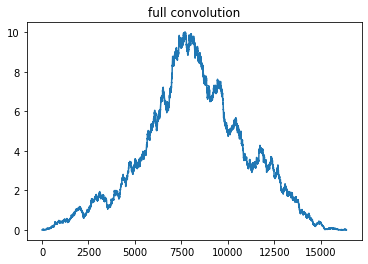

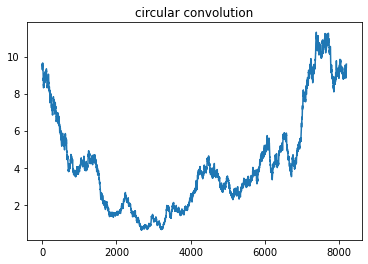

In [142]:
frequency = 10e6
sampleFrequency = 200e6
amplitude = 1
N = 8192
var = 1e3
phi = 0.25

# The normalization makes it so that every template has the same inner product on data with no noise in it.

s = generateSineWave(frequency, amplitude, sampleFrequency, N, phi=phi)

x = addNoise(s, var)

normalization = (1 / var) / np.sqrt(np.vdot(s, s) / var)

h = s * normalization

convolution = np.convolve(h, x, mode='full')

plt.figure()
plt.plot(abs(convolution)**2)
plt.title('full convolution')

fft_h = np.fft.fftshift(np.fft.fft(h)) / N
fft_x = np.fft.fftshift(np.fft.fft(x)) / N

prod_xh = fft_h * fft_x

circ_conv = N ** 2 * np.fft.ifft(prod_xh)

#n = addNoise(np.zeros(N, dtype=np.complex128), var)

#convolution = scipy.signal.fftconvolve(h, n, mode='full')

plt.figure()
plt.plot(abs(circ_conv)**2)
plt.title('circular convolution')

print('full convolution: %.2f' % (abs(convolution) ** 2)[8192])
print('circular convolution: %.2f' % (abs(circ_conv) ** 2)[0])

print('full convolution: %.2f' % np.max(abs(convolution) ** 2))
print('circular convolution: %.2f' % np.max(abs(circ_conv) ** 2))



full convolution: 9.56
circular convolution: 9.53
full convolution: 9.99
circular convolution: 11.31


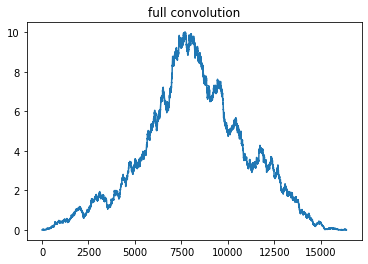

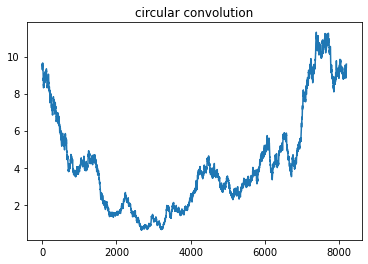

In [142]:
frequency = 10e6
sampleFrequency = 200e6
amplitude = 1
N = 8192
var = 1e3
phi = 0.25

# The normalization makes it so that every template has the same inner product on data with no noise in it.

s = generateSineWave(frequency, amplitude, sampleFrequency, N, phi=phi)

x = addNoise(s, var)

normalization = (1 / var) / np.sqrt(np.vdot(s, s) / var)

h = s * normalization

convolution = np.convolve(h, x, mode='full')

plt.figure()
plt.plot(abs(convolution)**2)
plt.title('full convolution')

fft_h = np.fft.fftshift(np.fft.fft(h)) / N
fft_x = np.fft.fftshift(np.fft.fft(x)) / N

prod_xh = fft_h * fft_x

circ_conv = N ** 2 * np.fft.ifft(prod_xh)

#n = addNoise(np.zeros(N, dtype=np.complex128), var)

#convolution = scipy.signal.fftconvolve(h, n, mode='full')

plt.figure()
plt.plot(abs(circ_conv)**2)
plt.title('circular convolution')

print('full convolution: %.2f' % (abs(convolution) ** 2)[8192])
print('circular convolution: %.2f' % (abs(circ_conv) ** 2)[0])

print('full convolution: %.2f' % np.max(abs(convolution) ** 2))
print('circular convolution: %.2f' % np.max(abs(circ_conv) ** 2))

